In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
from scipy import stats

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

<p>Estandarizar las variables numéricas de vuestro set de datos</p>

In [2]:
df = pd.read_pickle('datos/airline_limpieza.pkl')
df.head(5)

,satisfaccion,genero,tipo_de_cliente,clase,comfort_asiento,puntualidad,comida_y_bebida,ubicación_puerta_embarque,ocio_vuelo,soporte_online,facilidad_reserva_online,servicio_durante_el_vuelo,manejo_equipaje,facturacion,limpieza,embarque_online,retraso_salida_minutos
0,satisfied,Female,Loyal Customer,Eco,Nada satisfecho,Nada satisfecho,Nada satisfecho,Poco Satisfecho,Satisfecho,Poco Satisfecho,Neutral,Neutral,Neutral,Muy satisfecho,Neutral,Poco Satisfecho,0
1,satisfied,Male,Loyal Customer,Business,Nada satisfecho,Nada satisfecho,Nada satisfecho,Neutral,Poco Satisfecho,Poco Satisfecho,Neutral,Satisfecho,Satisfecho,Poco Satisfecho,Neutral,Poco Satisfecho,310
2,satisfied,Female,Loyal Customer,Eco,Nada satisfecho,Nada satisfecho,Nada satisfecho,Neutral,Nada satisfecho,Poco Satisfecho,Poco Satisfecho,Neutral,Satisfecho,Satisfecho,Satisfecho,Poco Satisfecho,0
3,satisfied,Female,Loyal Customer,Eco,Nada satisfecho,Nada satisfecho,Nada satisfecho,Neutral,Satisfecho,Neutral,Insatisfecho,Insatisfecho,Insatisfecho,Satisfecho,Insatisfecho,Neutral,0
4,satisfied,Female,Loyal Customer,Eco,Nada satisfecho,Nada satisfecho,Nada satisfecho,Neutral,Neutral,Satisfecho,Poco Satisfecho,Poco Satisfecho,Poco Satisfecho,Satisfecho,Poco Satisfecho,Muy satisfecho,0


In [3]:
df.shape

(129880, 17)

<p> La estandarización se aplica únicamente en variables numéricas. Vamos a proceder a la estandarización con el método robust ya que hemos decidido NO gestionar los outliers. </p>

In [4]:
from sklearn.preprocessing import RobustScaler

In [5]:
numericas = df.select_dtypes(np.number)

In [6]:
# Ejecutamos el robust
robust = RobustScaler()

In [7]:
X_robust = robust.fit_transform(numericas)

In [8]:
# Creamos el dataframe con los datos estandarizados.
numericas_robust = pd.DataFrame(X_robust, columns = numericas.columns)
numericas_robust.head(2)

,retraso_salida_minutos
0,0.000000
1,25.833333


<p>Codificar las variables categóricas. Recordad que tendréis que tener en cuenta si vuestras variables tienen orden o no.</p>

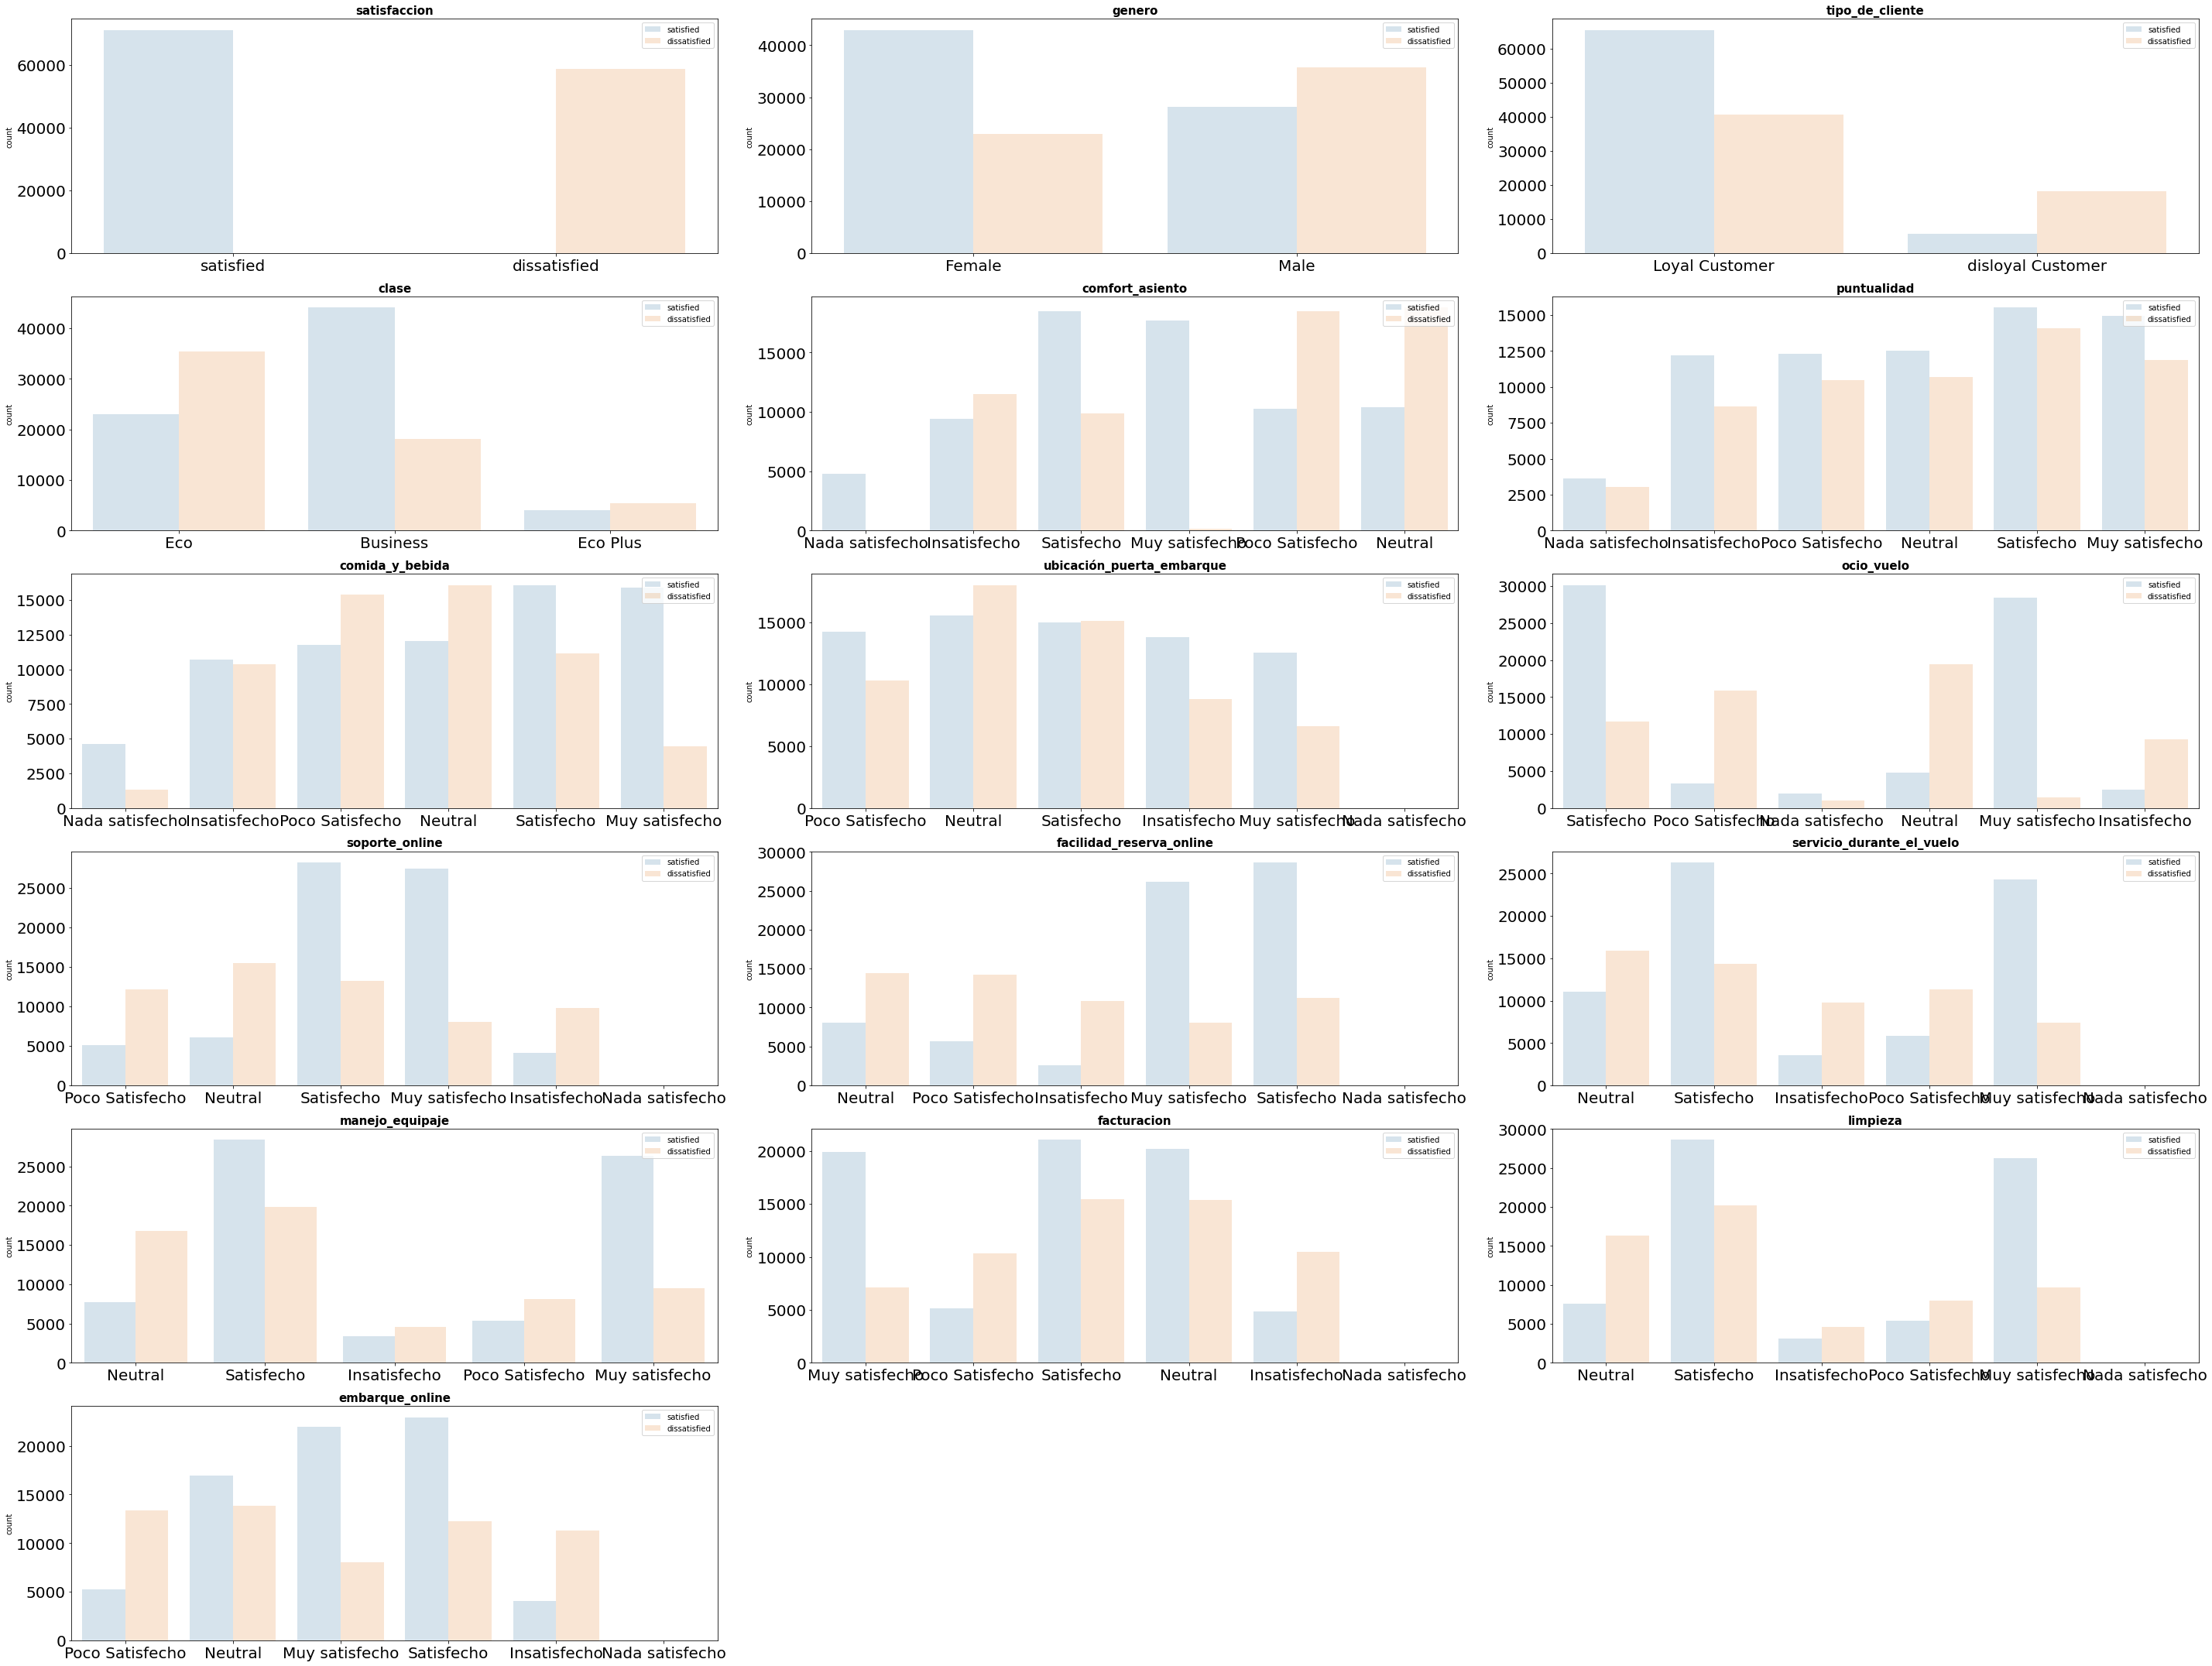

In [9]:
fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (40,30))

axes = axes.flat
columnas_cat = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "satisfaccion",
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])    

fig.tight_layout();

In [10]:
map_genero = {'Female' : 1, 'Male': 2}
map_cliente = { 'Loyal Customer' : 1, 'disloyal Customer': 2}
map_clase = {'Business':1, 'Eco':2, 'Eco Plus': 2}
map_asiento = {'Nada satisfecho':1,'Satisfecho':1,'Muy satisfecho':1, 'Insatisfecho':2,'Poco Satisfecho':3, 'Neutral':3}
map_comida = {'Nada satisfecho':1,'Satisfecho':1,'Muy satisfecho':1, 'Insatisfecho':2,'Poco Satisfecho':3, 'Neutral':3}
map_puerta = {'Nada satisfecho':0, 'Satisfecho':2,'Muy satisfecho':1, 'Insatisfecho':1,'Poco Satisfecho':1, 'Neutral':3}
map_ocio = {'Nada satisfecho':0, 'Satisfecho':1,'Muy satisfecho':1, 'Insatisfecho':2,'Poco Satisfecho':2, 'Neutral':2}
map_comida = {'Nada satisfecho':1,'Satisfecho':1,'Muy satisfecho':1, 'Insatisfecho':2,'Poco Satisfecho':2, 'Neutral':2}
map_soporte = {'Nada satisfecho':0,'Satisfecho':1,'Muy satisfecho':1, 'Insatisfecho':2,'Poco Satisfecho':2, 'Neutral':2}
map_reserva = {'Nada satisfecho':0,'Satisfecho':1,'Muy satisfecho':1, 'Insatisfecho':2,'Poco Satisfecho':2, 'Neutral':2}
map_servicio = {'Nada satisfecho':0,'Satisfecho':1,'Muy satisfecho':1, 'Insatisfecho':2,'Poco Satisfecho':2, 'Neutral':2}
map_equipaje = {'Nada satisfecho':0,'Satisfecho':1,'Muy satisfecho':1, 'Insatisfecho':2,'Poco Satisfecho':2, 'Neutral':2}
map_facturacion = {'Nada satisfecho':0,'Satisfecho':1,'Muy satisfecho':1, 'Insatisfecho':2,'Poco Satisfecho':2, 'Neutral':1}
map_limpieza = {'Nada satisfecho':0,'Satisfecho':1,'Muy satisfecho':1, 'Insatisfecho':2,'Poco Satisfecho':2, 'Neutral':2}
map_checkin = {'Nada satisfecho':0,'Satisfecho':1,'Muy satisfecho':1, 'Insatisfecho':2,'Poco Satisfecho':2, 'Neutral':1}

In [11]:
df['genero']=df['genero'].map(map_genero)
df['tipo_de_cliente']=df['tipo_de_cliente'].map(map_cliente)
df['clase']=df['clase'].map(map_clase)
df['comfort_asiento']=df['comfort_asiento'].map(map_asiento)
df['comida_y_bebida']=df['comida_y_bebida'].map(map_comida)
df['ubicación_puerta_embarque']=df['ubicación_puerta_embarque'].map(map_puerta)
df['ocio_vuelo']=df['ocio_vuelo'].map(map_ocio)
df['soporte_online'] = df['soporte_online'].map(map_soporte)
df['facilidad_reserva_online']=df['facilidad_reserva_online'].map(map_reserva)
df['servicio_durante_el_vuelo']=df['servicio_durante_el_vuelo'].map(map_servicio)
df['manejo_equipaje']=df['manejo_equipaje'].map(map_equipaje)
df['facturacion']=df['facturacion'].map(map_facturacion)
df['limpieza']=df['limpieza'].map(map_limpieza)
df['embarque_online']=df['embarque_online'].map(map_checkin)

In [12]:
df.head(5)

,satisfaccion,genero,tipo_de_cliente,clase,comfort_asiento,puntualidad,comida_y_bebida,ubicación_puerta_embarque,ocio_vuelo,soporte_online,facilidad_reserva_online,servicio_durante_el_vuelo,manejo_equipaje,facturacion,limpieza,embarque_online,retraso_salida_minutos
0,satisfied,1,1,2,1,Nada satisfecho,1,1,1,2,2,2,2,1,2,2,0
1,satisfied,2,1,1,1,Nada satisfecho,1,3,2,2,2,1,1,2,2,2,310
2,satisfied,1,1,2,1,Nada satisfecho,1,3,0,2,2,2,1,1,1,2,0
3,satisfied,1,1,2,1,Nada satisfecho,1,3,1,2,2,2,2,1,2,1,0
4,satisfied,1,1,2,1,Nada satisfecho,1,3,2,1,2,2,2,1,2,1,0


In [13]:
df.isna().sum()

satisfaccion                 0
genero                       0
tipo_de_cliente              0
clase                        0
comfort_asiento              0
puntualidad                  0
comida_y_bebida              0
ubicación_puerta_embarque    0
ocio_vuelo                   0
soporte_online               0
facilidad_reserva_online     0
servicio_durante_el_vuelo    0
manejo_equipaje              0
facturacion                  0
limpieza                     0
embarque_online              0
retraso_salida_minutos       0
dtype: int64

Vamos a hacer un get_dummies para codificar una variable categórica que no tiene orden.Ya que puntualidad es nuestra única variable SIN orden.Este método nos crea tantas columnas como subcategoría tenemos en puntualidad. Estas columnas van a aparecer al final del dataframe.

In [14]:
df_dummies = pd.get_dummies(df['puntualidad'], prefix_sep = "_", prefix = 'puntualidad', dtype = int)

In [15]:
df_final = pd.concat([df, df_dummies], axis = 1)
df_final.head()

,satisfaccion,genero,tipo_de_cliente,clase,comfort_asiento,puntualidad,comida_y_bebida,ubicación_puerta_embarque,ocio_vuelo,soporte_online,facilidad_reserva_online,servicio_durante_el_vuelo,manejo_equipaje,facturacion,limpieza,embarque_online,retraso_salida_minutos,puntualidad_Insatisfecho,puntualidad_Muy satisfecho,puntualidad_Nada satisfecho,puntualidad_Neutral,puntualidad_Poco Satisfecho,puntualidad_Satisfecho
0,satisfied,1,1,2,1,Nada satisfecho,1,1,1,2,2,2,2,1,2,2,0,0,0,1,0,0,0
1,satisfied,2,1,1,1,Nada satisfecho,1,3,2,2,2,1,1,2,2,2,310,0,0,1,0,0,0
2,satisfied,1,1,2,1,Nada satisfecho,1,3,0,2,2,2,1,1,1,2,0,0,0,1,0,0,0
3,satisfied,1,1,2,1,Nada satisfecho,1,3,1,2,2,2,2,1,2,1,0,0,0,1,0,0,0
4,satisfied,1,1,2,1,Nada satisfecho,1,3,2,1,2,2,2,1,2,1,0,0,0,1,0,0,0


In [16]:
df_final.drop(['puntualidad'], axis=1,inplace=True)

<p>Chequear si vuestros datos están balanceados. En caso de que no lo estén utilizad algunas de las herramientas aprendidas en la lección para balancearlos.</p>

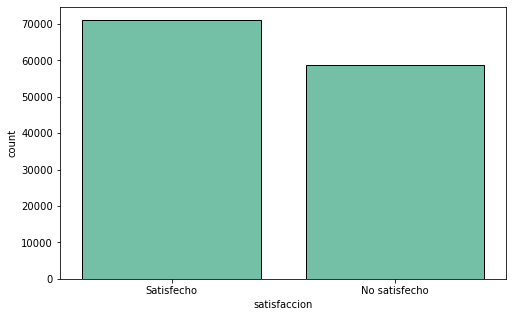

In [17]:
#Vamos a realizar un countplot para comprobar si nuestra VR está balanceada.
plt.figure(figsize=(8,5)) 

fig1 = sns.countplot(data = df_final, x = "satisfaccion",  color = "mediumaquamarine",  edgecolor='black')
fig1.set(xticklabels=["Satisfecho", "No satisfecho"]) 
plt.show()

<p> Como se puede observar la VR no se encuentra balanceada así que procederemos a realizar el balanceo utilizando el SMOTETomek</p>

In [18]:
y = df_final['satisfaccion']
X = df_final.drop('satisfaccion', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [19]:
os_us = SMOTETomek()
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)

In [20]:
#Los valores de la VR en el dataframe original
y_train.value_counts()

satisfied       49766
dissatisfied    41150
Name: satisfaccion, dtype: int64

In [21]:
#Los valores de la VR balanceados
y_train_res.value_counts()

dissatisfied    49068
satisfied       49068
Name: satisfaccion, dtype: int64

<p>Guardad el dataframe con los cambios que habéis aplicado para utilizarlo en la siguiente lección.</p>

In [22]:
df_final.to_pickle('datos/airline_cod.pkl')